# API (Application Programming Interface)

API란 웹 상에서 데이터를 주고받을 수 있도록 미리 정해진 규칙과 프로토콜을 제공하는 인터페이스입니다. 인공지능 개발자는 이러한 API를 통해 데이터를 쉽게 수집하고 활용할 수 있습니다.

날씨 정보, 지리 정보, 주가 정보, 소셜 미디어 데이터 등 다양한 데이터를 API를 통해 수집할 수 있습니다. 이렇게 수집한 데이터를 기반으로 인공지능 모델을 학습시키고 예측 모델을 구축할 수 있습니다.

API를 사용하면 데이터dml 실시간으로 수집도 가능합니다. 데이터 분석가나 인공지능 개발자는 API를 통해 빠르게 변화하는 데이터를 수집하고, 이를 바탕으로 인공지능 모델을 최신화하고 새로운 트렌드에 대응할 수 있습니다.

또한, API를 활용하면 데이터를 가공하거나 필요한 부분만 추출할 수 있습니다. 이를 통해 인공지능 개발자는 필요한 데이터만 추출하고 이를 활용하여 모델을 더욱 효과적으로 구성할 수 있습니다.

이러한 API를 활용한 데이터 수집은 파이썬에서도 쉽게 구현할 수 있습니다. 
requests 라이브러리를 이용하여 API를 호출하고, JSON 또는 XML과 같은 형식으로 데이터를 수집하고 가공할 수 있습니다.

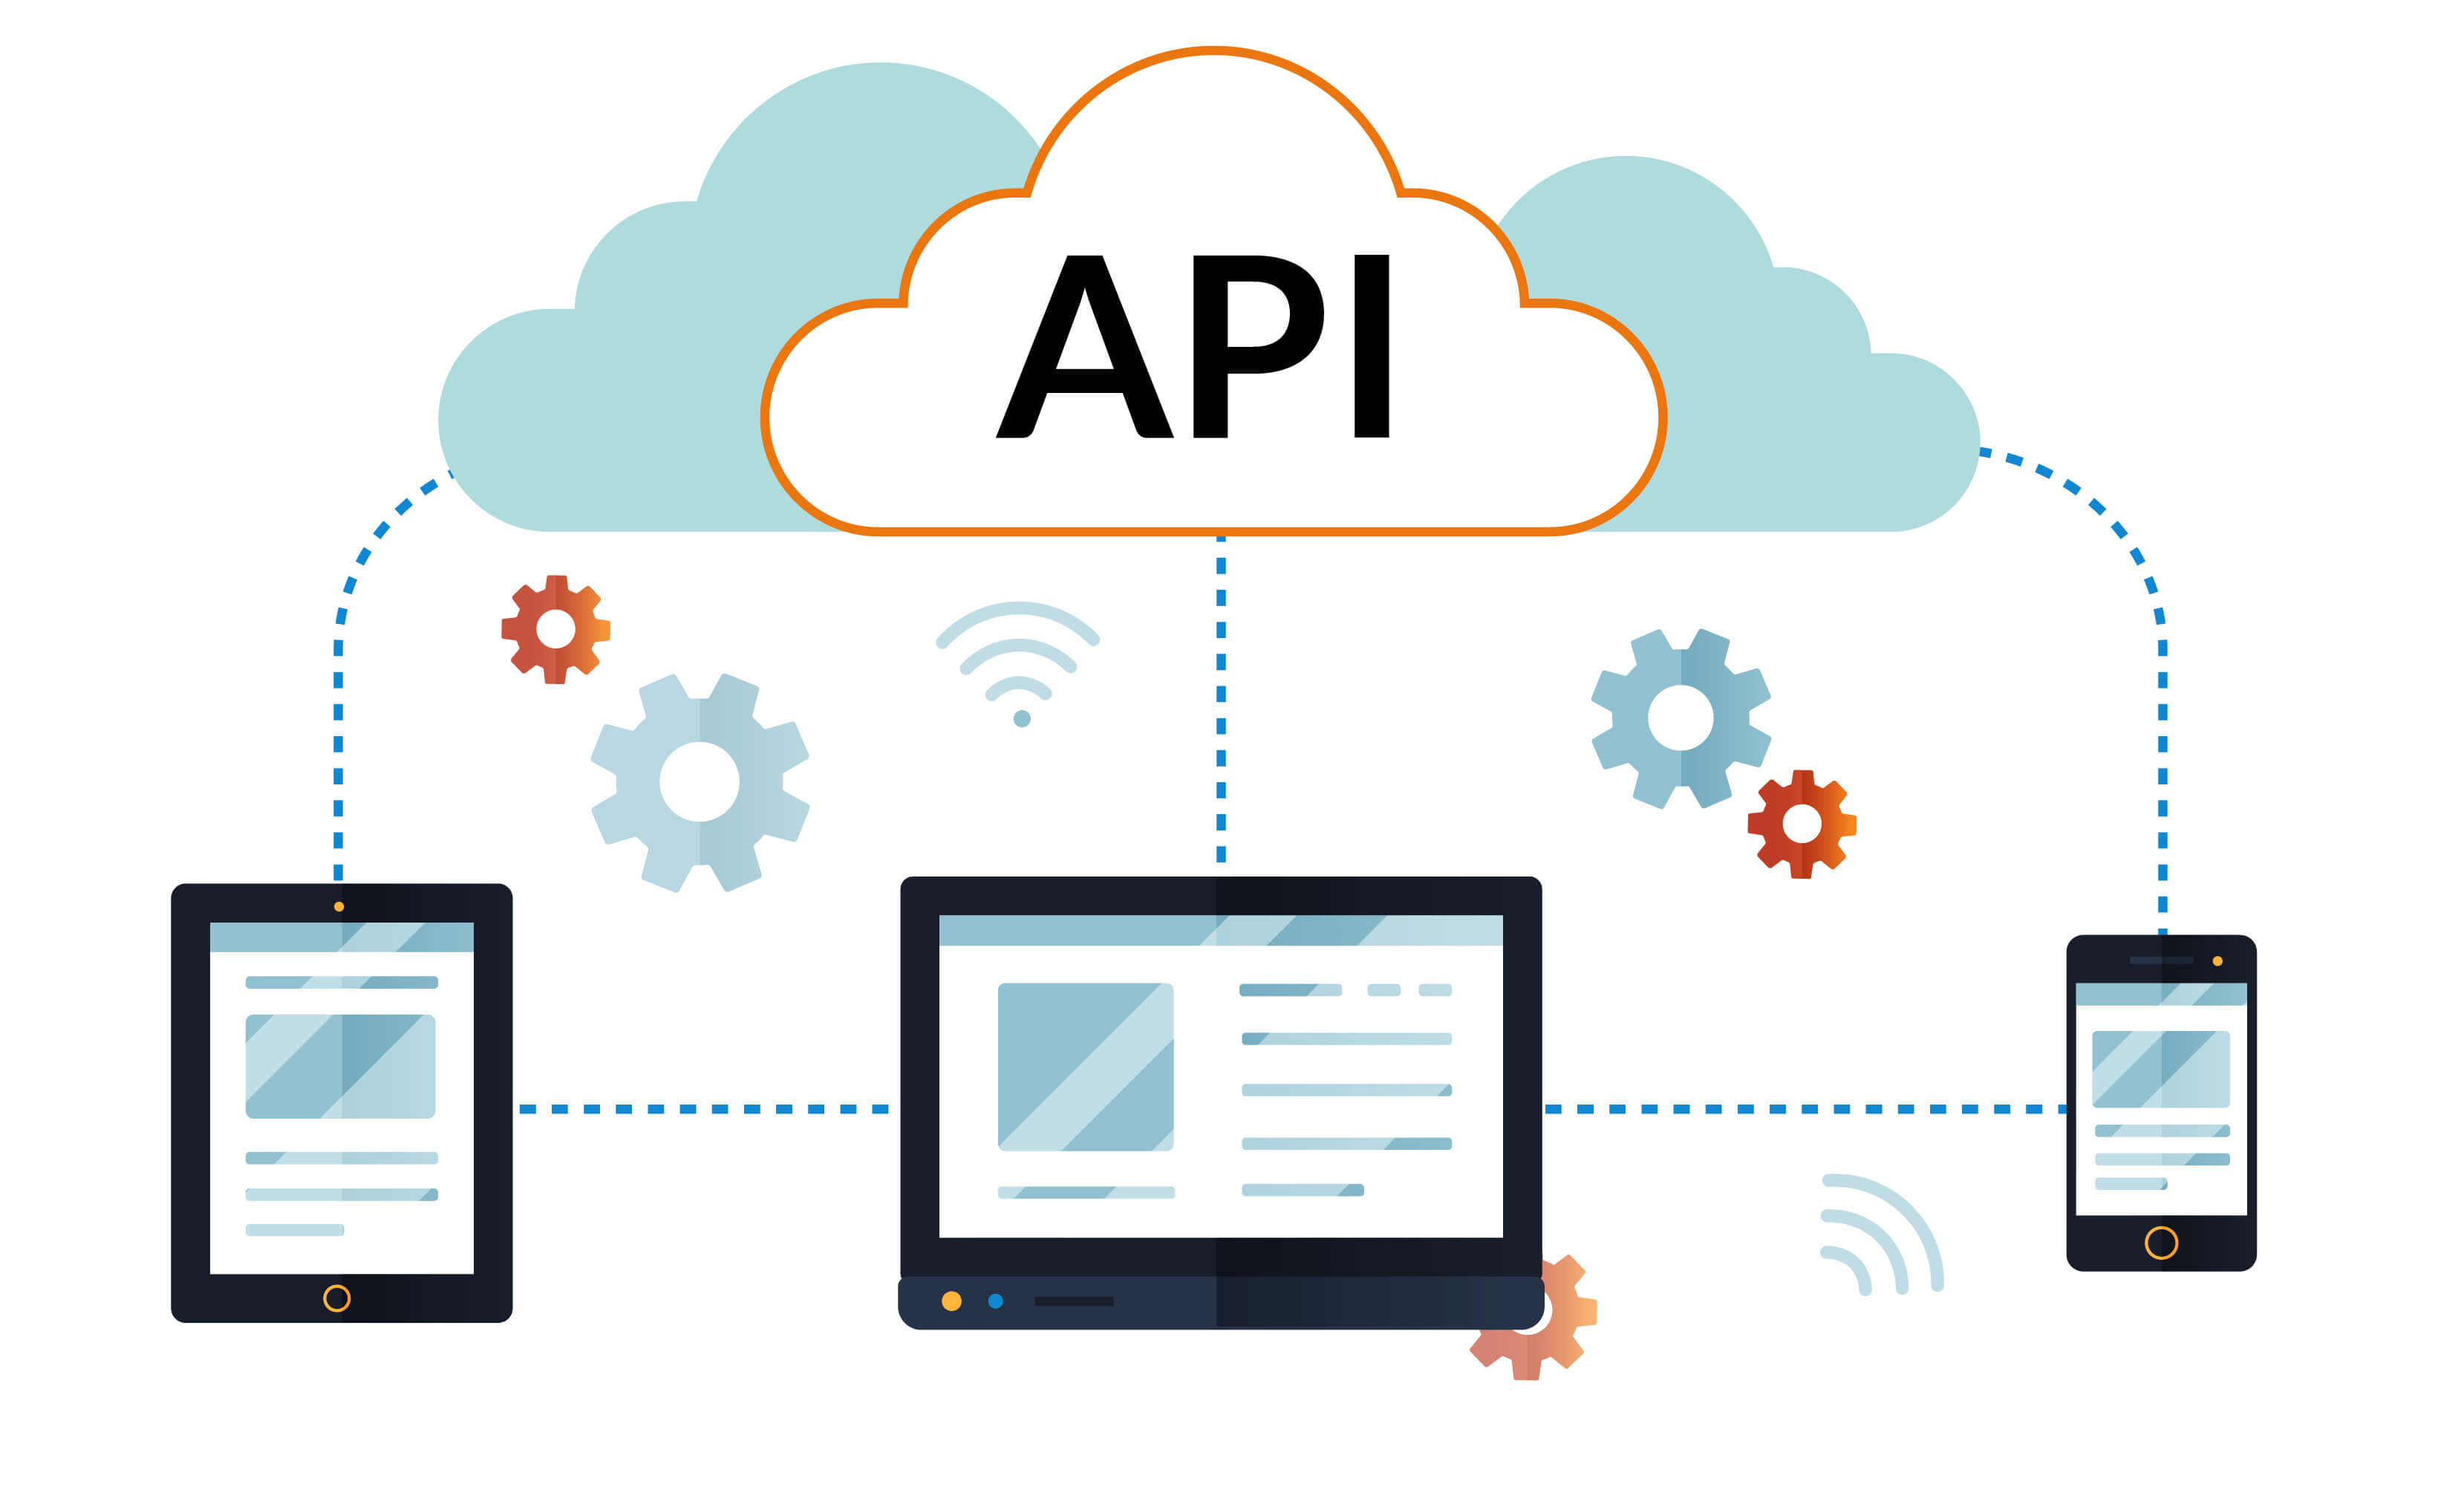





https://cs-fundamentals.blogspot.com/2020/06/basic-api-development-part-1-importance.html

## OpenWeatherMap 날씨정보

[API 발급 및 활용방법]
* https://openweathermap.org/api 사이트에서 Current Weather data에 대한 API doc 내용을 파악
* 개발자 등록을 하고 API 키 발급 받음(https://home.openweathermap.org/users/sign_up)
* New Account 등록 후 API Keys라는 탭에서 API Key 확인 가능
* 기본적으로 유료 사이트이지만 현재 날씨, 5일까지의 날씨는 무료로 사용할 수 있음(단 1분에 60번만 호출 가능)

[수집 데이터]
* 서울, 토쿄, 뉴욕의 날씨를 가져오는 프로그램 작성(text로 가져와서 json으로 변환하여 일차 출력)
  - cities = ["Seoul,KR", "Tokyo,JP", "New York,US"]
  - 가져올 정보 : 도시별 날씨(description), 최저 기온(temp_min), 최고 기온(temp_max), 습도(humidity), 기압(pressure), 풍속(speed)
  - 기온 데이터는 켈빈 온도로 되어 있으며 섭씨 온도로 변환해서 출력
* json 포멧으로 출력 데이터를 아래와 같이 가독력 있게 출력(소수점 2번째에서 반올림 처리)


[출력형식]

    도시 = Seoul
    | 날씨 = broken clouds
    | 최저 기온 = -1.0 2
    | 최고 기온 = 2.0 2
    | 습도 = 74
    | 기압 = 1023
    | 풍속 = 0.5

### 예시 1

In [15]:
import json
import requests as rq
apikey = "dace8640b2279c6914a50940b60e837a"
api = 'http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={key}'
url = api.format(key=apikey)
res = rq.get(url)
data = json.loads(res.text)
print(data)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1683018000, 'main': {'temp': 283.47, 'feels_like': 281.58, 'temp_min': 283.47, 'temp_max': 285.72, 'pressure': 1025, 'sea_level': 1025, 'grnd_level': 1007, 'humidity': 39, 'temp_kf': -2.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'clouds': {'all': 3}, 'wind': {'speed': 2.55, 'deg': 259, 'gust': 3.76}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2023-05-02 09:00:00'}, {'dt': 1683028800, 'main': {'temp': 285.92, 'feels_like': 284.14, 'temp_min': 285.92, 'temp_max': 287.7, 'pressure': 1024, 'sea_level': 1024, 'grnd_level': 1006, 'humidity': 34, 'temp_kf': -1.78}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'clouds': {'all': 24}, 'wind': {'speed': 3.27, 'deg': 233, 'gust': 4.12}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2023-05-02 12:00:00'}, {'dt': 1683039600, 'main': {'temp': 287.37, 'feels_like': 285.7

In [3]:
import json
import requests as rq
apikey = "dace8640b2279c6914a50940b60e837a"
cities = ["Seoul,KR", "Tokyo,JP", "New York,US"]
api = "http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={key}"
# api = "api.openweathermap.org/data/2.5/forecast?id=524901&appid={API key}"
k2c = lambda k: k - 273.15
for name in cities:
    url = api.format(city=name, key=apikey)
    res = rq.get(url)
    data = json.loads(res.text)
    print(data)

{'coord': {'lon': 126.9778, 'lat': 37.5683}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 297.04, 'feels_like': 296.01, 'temp_min': 294.84, 'temp_max': 297.81, 'pressure': 1022, 'humidity': 20}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 210, 'gust': 9.77}, 'clouds': {'all': 0}, 'dt': 1683009212, 'sys': {'type': 1, 'id': 8105, 'country': 'KR', 'sunrise': 1682973386, 'sunset': 1683022902}, 'timezone': 32400, 'id': 1835848, 'name': 'Seoul', 'cod': 200}
{'coord': {'lon': 139.6917, 'lat': 35.6895}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 295.6, 'feels_like': 294.53, 'temp_min': 294.63, 'temp_max': 296.37, 'pressure': 1019, 'humidity': 24}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1683009303, 'sys': {'type': 2, 'id': 2001249, 'country': 'JP', 'sunrise': 1682970538, 'sunset': 1

In [4]:
import json
import requests as rq
import numpy as np
apikey = "dace8640b2279c6914a50940b60e837a"
cities = ["Seoul,KR", "Tokyo,JP", "New York,US"]
api = "http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={key}"
k2c = lambda k: k - 273.15
for name in cities:
    url = api.format(city=name, key=apikey)
    res = rq.get(url)
    data = json.loads(res.text)

    print("+ 도시 =", data["name"])
    print("| 날씨 =", data["weather"][0]["description"])
    print("| 최저 기온 =", np.round(k2c(data["main"]["temp_min"])), 2)
    print("| 최고 기온 =", np.round(k2c(data["main"]["temp_max"])), 2)
    print("| 습도 =", data["main"]["humidity"])
    print("| 기압 =", data["main"]["pressure"])
    print("| 풍속 =", data["wind"]["speed"])
    print("")

+ 도시 = Seoul
| 날씨 = clear sky
| 최저 기온 = 22.0 2
| 최고 기온 = 25.0 2
| 습도 = 20
| 기압 = 1022
| 풍속 = 4.12

+ 도시 = Tokyo
| 날씨 = few clouds
| 최저 기온 = 21.0 2
| 최고 기온 = 23.0 2
| 습도 = 24
| 기압 = 1019
| 풍속 = 8.75

+ 도시 = New York
| 날씨 = scattered clouds
| 최저 기온 = 8.0 2
| 최고 기온 = 12.0 2
| 습도 = 67
| 기압 = 995
| 풍속 = 4.02



### 예시 2


매개변수 딕셔너리 활용 (언어, api key, 도시이름, 결과값 단위)


In [5]:
import requests
import json

key= "dace8640b2279c6914a50940b60e837a"
cities = ['Seoul','Tokyo','New York']

url = 'http://api.openweathermap.org/data/2.5/weather?'
params = {'lang' : 'kr' , 'appid' : key,'q':'Tokyo' }
response = requests.get(url, params=params)
response.text

'{"coord":{"lon":139.6917,"lat":35.6895},"weather":[{"id":801,"main":"Clouds","description":"약간의 구름이 낀 하늘","icon":"02d"}],"base":"stations","main":{"temp":295.6,"feels_like":294.53,"temp_min":294.63,"temp_max":296.37,"pressure":1019,"humidity":24},"visibility":10000,"wind":{"speed":8.75,"deg":340},"clouds":{"all":20},"dt":1683009303,"sys":{"type":2,"id":2001249,"country":"JP","sunrise":1682970538,"sunset":1683019648},"timezone":32400,"id":1850144,"name":"Tokyo","cod":200}'

In [19]:
# OpenWeatherMap API에서 제공하는 날씨 정보를 가져오는 예제 코드
# cities 변수에는 날씨 정보를 가져올 도시들의 이름을 리스트로 저장
import requests
import json

key= 'cdf3410b0e1f5964a99c79cf488ef400'
cities = ['Seoul','Tokyo','New York']

# cities 리스트에 있는 도시들의 날씨 정보를 반복문을 통해 가져오기
for city in cities:
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    params = {'lang' : 'kr' , 'appid' : key,'q':city,'units':'metric' }
    response = requests.get(url, params=params).text
    data = json.loads(response)
    print("+ 도시 =", data["name"]) # 도시 이름을 출력
    print("| 날씨 =", data["weather"][0]["description"]) # 날씨 상태를 출력
    print("| 최저 기온 =", data["main"]["temp_min"]) # 최저 기온을 출력
    print("| 최고 기온 =", data["main"]["temp_max"]) # 최고 기온을 출력
    print("| 습도 =", data["main"]["humidity"]) # 습도를 출력
    print("| 기압 =", data["main"]["pressure"]) # 기압을 출력
    print("| 풍향 =", data["wind"]["deg"]) # 풍향을 출력
    print("| 풍속 =", data["wind"]["speed"]) # 풍속을 출력
    print("")


+ 도시 = Seoul
| 날씨 = 맑음
| 최저 기온 = 21.69
| 최고 기온 = 23.78
| 습도 = 20
| 기압 = 1022
| 풍향 = 210
| 풍속 = 4.12

+ 도시 = Tokyo
| 날씨 = 약간의 구름이 낀 하늘
| 최저 기온 = 20.33
| 최고 기온 = 23.78
| 습도 = 25
| 기압 = 1019
| 풍향 = 350
| 풍속 = 8.75

+ 도시 = New York
| 날씨 = 온흐림
| 최저 기온 = 7.31
| 최고 기온 = 11.65
| 습도 = 68
| 기압 = 995
| 풍향 = 220
| 풍속 = 4.12



## 공공데이터 포털

https://www.data.go.kr/

### 예시 1 - 상권조회

In [24]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

skey = 'WTWMH9MLW8jYBIKN%2Faud7dwj6T4E3Mwr7Eciq%2FFs6m0KrUwz4UUGt%2FznYEtD%2FcWPrHtD13F6L0FD5l82HyrAHA%3D%3D'
res_id = 'storezone'
stype ='json'
url = 'http://apis.data.go.kr/B553077/api/open/sdsc2/baroApi'
params = f'?ServiceKey={skey}&type={stype}&resId={res_id}&' + urlencode({quote_plus('key'):'9244'})
query = url + params
print(query)

request = Request(query)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
items = response_dict['body']['items']

df = pd.DataFrame(items)
df



http://apis.data.go.kr/B553077/api/open/sdsc2/baroApi?ServiceKey=WTWMH9MLW8jYBIKN%2Faud7dwj6T4E3Mwr7Eciq%2FFs6m0KrUwz4UUGt%2FznYEtD%2FcWPrHtD13F6L0FD5l82HyrAHA%3D%3D&type=json&resId=storezone&key=9244
b'{\n\t"header" : {\n\t\t"description" : "\xec\x86\x8c\xec\x83\x81\xea\xb3\xb5\xec\x9d\xb8\xec\x8b\x9c\xec\x9e\xa5\xec\xa7\x84\xed\x9d\xa5\xea\xb3\xb5\xeb\x8b\xa8 \xec\xa3\xbc\xec\x9a\x94\xec\x83\x81\xea\xb6\x8c"\n\t\t,"columns" : ["\xec\x83\x81\xea\xb6\x8c\xeb\xb2\x88\xed\x98\xb8","\xec\x83\x81\xea\xb6\x8c\xeb\xaa\x85","\xec\x8b\x9c\xeb\x8f\x84\xec\xbd\x94\xeb\x93\x9c","\xec\x8b\x9c\xeb\x8f\x84\xeb\xaa\x85","\xec\x8b\x9c\xea\xb5\xb0\xea\xb5\xac\xec\xbd\x94\xeb\x93\x9c","\xec\x8b\x9c\xea\xb5\xb0\xea\xb5\xac\xeb\xaa\x85","\xec\x83\x81\xea\xb6\x8c\xeb\xa9\xb4\xec\xa0\x81","\xec\xa2\x8c\xed\x91\x9c\xea\xb0\x9c\xec\x88\x98","\xec\xa2\x8c\xed\x91\x9c\xea\xb0\x92","\xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0\xea\xb8\xb0\xec\xa4\x80\xec\x9d\xbc\xec\x9e\x90"]\n\t\t,"resultCode" : "00"\n\t\t,"resultMsg" 

trarNo mainTrarNm ctprvnCd ctprvnNm signguCd signguNm  trarArea  coordNum  \
0    9244     영등포역_1       11    서울특별시    11560     영등포구     81469        21   

                                              coords      stdrDt  
0  MULTIPOLYGON (((126.905891890858 37.5155742321...  2021-06-30

In [8]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

def baro_api(skey, res_id, encode):

    stype ='json'
    url = 'http://apis.data.go.kr/B553077/api/open/sdsc2/baroApi'
    params = f'?ServiceKey={skey}&type={stype}&resId={res_id}&' + encode
    query = url + params
#     print(query)

    request = Request(query)
    request.get_method = lambda: 'GET'
    response_body = urlopen(request).read()
#     print(response_body)

    response_dict = json.loads(response_body.decode('utf-8'))
    items = response_dict['body']['items']

    df = pd.DataFrame(items)
    return df

#### 지정 상권조회

In [20]:
skey = 'WTWMH9MLW8jYBIKN%2Faud7dwj6T4E3Mwr7Eciq%2FFs6m0KrUwz4UUGt%2FznYEtD%2FcWPrHtD13F6L0FD5l82HyrAHA%3D%3D'
res_id = 'storezone'
encode = urlencode({quote_plus('key'):'9193'})
# encode = urlencode({quote_plus('key'):'9140'})
# encode = urlencode({quote_plus('key'):'9143'})
baro_api(skey, res_id, encode)

trarNo  mainTrarNm ctprvnCd ctprvnNm signguCd signguNm  trarArea  coordNum  \
0    9193  동대문역사문화공원역       11    서울특별시    11140       중구     79167        17   

                                              coords      stdrDt  
0  MULTIPOLYGON (((127.00304244009 37.56673071604...  2021-06-30

#### 반경내 상권조회

In [21]:
encode = urlencode({quote_plus('catId'):'radius', quote_plus('radius'):'500', 
                    quote_plus('cx'):'127.004528',quote_plus('cy'):'37.567538'})
baro_api(skey, res_id, encode)

Empty DataFrame
Columns: []
Index: []

#### 사각형내 상권조회

In [22]:
encode = urlencode({quote_plus('catId'):'rectangle', quote_plus('minx'):'126.978020', 
                    quote_plus('miny'):'37.557825', quote_plus('maxx'):'126.987732', quote_plus('maxy'):'37.562022'})
baro_api(skey, res_id, encode)

Empty DataFrame
Columns: []
Index: []

#### 행정단위 상권조회

In [12]:
encode = urlencode({quote_plus('catId'):'dong', quote_plus('divId'):'adongCd', quote_plus('key'):'1168069000'})
baro_api(skey, res_id, encode)

trarNo mainTrarNm ctprvnCd ctprvnNm signguCd signguNm  trarArea  coordNum  \
0    9324      포이사거리       11    서울특별시    11680      강남구     14033        33   

                                              coords      stdrDt  
0  MULTIPOLYGON (((127.044811833677 37.4781705036...  2021-06-30

### 예시 2 - 상가업소 조회

#### 행정동 단위 상가업소 조회



In [25]:
res_id = 'store'
    
encode = urlencode({quote_plus('catId'):'dong', quote_plus('divId'):'ctprvnCd', quote_plus('key'):'11'})
baro_api(skey, res_id, encode)

bizesId         bizesNm brchNm indsLclsCd indsLclsNm  \
0   MA010120220700000340    온가족정신건강의학과의원                Q1       보건의료   
1   MA010120220700001496        가양성모내과의원                Q1       보건의료   
2   MA010120220700001621        남플란트치과의원                Q1       보건의료   
3   MA010120220700001703      편안한재활의학과의원                Q1       보건의료   
4   MA010120220700002183            기쁨내과                Q1       보건의료   
5   MA010120220700003416   삼성마음친구정신건강의학과                Q1       보건의료   
6   MA010120220700004115       성모탑정형외과의원                Q1       보건의료   
7   MA010120220700004173            수미상회                G2         소매   
8   MA010120220700004702        강남연세안과의원                Q1       보건의료   
9   MA010120220700008104    당신의정신건강의학과의원                Q1       보건의료   
10  MA010120220700009278  경희궁삼성마취통증의학과의원                Q1       보건의료   
11  MA010120220700010840            진양상회                G2         소매   
12  MA010120220700010856        잠실믿음정형외과                Q1       보건의료   
13  MA010120220700012011          젠로즈플라워                G2         소매   
14  MA010120220700012530           참튼튼병원                Q1       보건의료   
15  MA010120220700012577     금천삼성본정형외과의원                Q1       보건의료   
16  MA010120220700013031        태릉정원내과의원                Q1       보건의료   
17  MA010120220700013080        예성피아노교습소                P1         교육   
18  MA010120220700013239         조이음악교습소                P1         교육   
19  MA010120220700013249        장정화미술교습소                P1         교육   

   indsMclsCd indsMclsNm indsSclsCd  indsSclsNm  ksicCd  ...  \
0        Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
1        Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
2        Q102         의원     Q10210        치과의원  Q86202  ...   
3        Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
4        Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
5        Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
6        Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
7        G205     식료품 소매     G20506   채소/과일 소매업  G47215  ...   
8        Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
9        Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
10       Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
11       G205     식료품 소매     G20504  건어물/젓갈 소매업  G47213  ...   
12       Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
13       G219      식물 소매     G21901          꽃집  G47851  ...   
14       Q101         병원     Q10102        일반병원  Q86102  ...   
15       Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
16       Q102         의원     Q10201   내과/소아과 의원  Q86201  ...   
17       P106      기타 교육     P10609        음악학원  P85613  ...   
18       P106      기타 교육     P10609        음악학원  P85621  ...   
19       P106      기타 교육     P10611        미술학원  P85622  ...   

                     bldMngNo        bldNm                 rdnmAdr oldZipcd  \
0   1171010700104790000006368        헬리오시티      서울특별시 송파구 송파대로 345   138161   
1   1150010200106280006027141                   서울특별시 강서구 화곡로68길 3   157838   
2   1147010100111830005003622                    서울특별시 양천구 중앙로 265   158864   
3   1138010600100120032025832         상일빌딩      서울특별시 은평구 통일로67길 3   122837   
4   1174010800104400000004039         대성빌딩     서울특별시 강동구 양재대로 1319   134846   
5   1168011500107140000026893        로얄프라자      서울특별시 강남구 광평로51길 8   135884   
6   1144010400105440000003652         고려빌딩       서울특별시 마포구 큰우물로 76   121704   
7   1168010800101450016008520                   서울특별시 강남구 학동로4길 35   135825   
8   1168010100107050029022378         선릉빌딩      서울특별시 강남구 테헤란로 339   135922   
9   1165010800113280011027576      대우도씨에빛2      서울특별시 서초구 강남대로 359   137858   
10  1141010100100020002030829         충정빌딩      서울특별시 서대문구 통일로 135   120721   
11  1114011200100500057021882               서울특별시 중구 남대문시장4길 28-12   100804   
12  1171010100102420010001202         규영빌딩     서울특별시 송파구 석촌호수로 118   138864   
13  1165010100107930020016058   

## Naver API

https://developers.naver.com/main/

### 예시 1 - 네이버 블로그 검색 API

In [33]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request
client_id = "xUCzXK76sez26412vcLf"
client_secret = "oCZNcdIe3A"
query = urllib.parse.quote(input('검색 질의 : '))
# encText = urllib.parse.quote("인공지능 개발자")
# url = "https://openapi.naver.com/v1/search/blog?query=" + query # json 결과
url = "https://openapi.naver.com/v1/search/blog.xml?query=" + query # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

검색 질의 : 인공지능 개발자
<?xml version="1.0" encoding="UTF-8"?><rss version="2.0"><channel><title>Naver Open API - blog ::&apos;인공지능 개발자&apos;</title><link>https://search.naver.com</link><description>Naver Search Result</description><lastBuildDate>Tue, 02 May 2023 17:03:24 +0900</lastBuildDate><total>89696</total><start>1</start><display>10</display><item><title>&lt;b&gt;인공지능 개발자&lt;/b&gt; : 비전공자도 취업이 가능한 이유</title><link>https://blog.naver.com/cdh0584/223080062892</link><description>그렇다면 비전공자가 &lt;b&gt;인공지능 개발자&lt;/b&gt;로 취업을 하기 위해서는 어떻게 준비해야 할까요?? 1. 인공지능 개발 실력 비전공자도 가능하고, 학력이 무관하다면 무조건 실력 위주로 뽑는다는 얘기겠죠?? 머신러닝... </description><bloggername>부날파 : 부러진날개로파다닥 New</bloggername><bloggerlink>blog.naver.com/cdh0584</bloggerlink><postdate>20230420</postdate></item><item><title>&lt;b&gt;인공지능 개발자&lt;/b&gt; 정말 비전공 취업이 정말 가능한가?</title><link>https://blog.naver.com/roseandme7753/223081319046</link><description>당연히 &lt;b&gt;인공지능 개발자&lt;/b&gt; 채용보다 웹 개발자, 앱 개발자 채용이 훨씬 많죠. 또한 아무리 인공지능이 발전한다고 해도 웹과 앱 시장은 지금도 미래

In [34]:
from bs4 import BeautifulSoup

xml = response_body.decode('utf-8')
bs = BeautifulSoup(xml,'lxml')
bs.get_text()

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


"Naver Open API - blog ::'인공지능 개발자'https://search.naver.comNaver Search ResultTue, 02 May 2023 17:03:24 +090089696110<b>인공지능 개발자</b> : 비전공자도 취업이 가능한 이유https://blog.naver.com/cdh0584/223080062892그렇다면 비전공자가 <b>인공지능 개발자</b>로 취업을 하기 위해서는 어떻게 준비해야 할까요?? 1. 인공지능 개발 실력 비전공자도 가능하고, 학력이 무관하다면 무조건 실력 위주로 뽑는다는 얘기겠죠?? 머신러닝... 부날파 : 부러진날개로파다닥 Newblog.naver.com/cdh058420230420<b>인공지능 개발자</b> 정말 비전공 취업이 정말 가능한가?https://blog.naver.com/roseandme7753/223081319046당연히 <b>인공지능 개발자</b> 채용보다 웹 개발자, 앱 개발자 채용이 훨씬 많죠. 또한 아무리 인공지능이 발전한다고 해도 웹과 앱 시장은 지금도 미래에도 가장 시장 규모가 크다는 건 변하지 않는 사실입니다.... 인테리어blog.naver.com/roseandme775320230421대구 프로그래밍학원 <b>인공지능 개발자</b>에 도전하세요https://blog.naver.com/blogmania77/223046102039대구 프로그래밍학원 <b>인공지능 개발자</b>에 도전하세요 안녕하세요, 경북산업직업전문학교입니다.... 향후 IT 프로그래머로서, 인공지능 전문 개발자로서의 꿈 이 있으시다면 저희와 함께 처음부터 탄탄하게... 경북산업직업전문학교blog.naver.com/blogmania7720230316<b>인공지능 개발자</b> 취업과 AI 대학원 진학의 갈림길https://blog.naver.com/ytkim2612/222892200141학위, 학벌에 개방적인 IT 대기업도 AI 개발자 채용은 최소 3년 이상 경력이나 석사 급을 채용하고 있어요. 따라서 <

In [36]:
import os
import sys
import urllib.request
client_id = "xUCzXK76sez26412vcLf"
client_secret = "oCZNcdIe3A"
query = urllib.parse.quote(input('검색 질의 : '))

url = "https://openapi.naver.com/v1/search/webkr?query=" + query # json 결과

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

검색 질의 : 데이터 분석
{
	"lastBuildDate":"Tue, 02 May 2023 17:04:05 +0900",
	"total":70911434,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"<b>데이터 분석<\/b>이란? <b>데이터<\/b>를 어떻게 <b>분석<\/b>할까? <b>분석<\/b> 예시 알아보기 - FineReport报表",
			"link":"https:\/\/www.finereport.com\/kr\/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D\/",
			"description":"이 글에서 <b>데이터 분석<\/b>이 무엇이며 기업에서 <b>데이터 분석<\/b> 을 어떻게 활용하는지 가이드를 정리하여 살펴보았습니다. <b>데이터<\/b>-드라이브는 올바른 업무 의사결정에 확보를 가질 수 있는 유일한 방법이기 때문에 오늘날 기업에는 <b>데이터 분석<\/b>이 더욱 중요해집니다."
		},
		{
			"title":"<b>데이터 분석<\/b>을 위한 5단계 절차",
			"link":"https:\/\/brunch.co.kr\/@data\/10",
			"description":"Part1. 공공<b>데이터 분석<\/b>의 개념 | 이번 글에서는 공공분야 <b>데이터 분석<\/b> 절차를 설명한다. 필자의 경험상, 공공<b>데이터 분석<\/b>은 통상 5가지 단계에 의하여 이루어진다. 이 단계는 폭포수 모델 처럼 순차적으로만 이루어지는 것 같지만, 실제로는 앞 단계를 반복하는 경우가 많다. 예컨대, 문제를 정의하였으나 원하는 <b>데이터<\/b>를 수집할 수 없다면 문제를 수정해야..."
		},
		{
			"title":"1.1 <b>데이터 분석<\/b>의 소개 — <b>데이터<\/b> 사이언스 스쿨",
			"link":"https:\/\/datascienceschool.net\/03%20machine%20learning\/01.0

### 예시 2 - 웹문서 검색

In [29]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re
import datetime

client_id = "xUCzXK76sez26412vcLf"
client_secret = "oCZNcdIe3A"

query = urllib.parse.quote(input("검색 질의: "))
# encText = urllib.parse.quote("빅데이터") # utf-8 형태로 인코딩
idx = 0
display = 100
start = 1
end = 1000

web_df = pd.DataFrame(columns=('Datetime','Title','Link','Description'))

for start_index in range(start, end, display):

    url = "https://openapi.naver.com/v1/search/webkr?query=" + query \
    + "&display=" + str(display) \
    + "&start=" + str(start_index)
     

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        
        items = response_dict['items']
        
        for item_index in range(0,len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, "", items[item_index]['title'])
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            
            web_df.loc[idx] = [datetime, title, link, description]
            idx += 1        
    else:
        print("Error Code:" + rescode)
web_df

검색 질의: 빅데이터


Datetime  \
0    <module 'datetime' from '/usr/lib/python3.10/d...   
1    <module 'datetime' from '/usr/lib/python3.10/d...   
2    <module 'datetime' from '/usr/lib/python3.10/d...   
3    <module 'datetime' from '/usr/lib/python3.10/d...   
4    <module 'datetime' from '/usr/lib/python3.10/d...   
..                                                 ...   
195  <module 'datetime' from '/usr/lib/python3.10/d...   
196  <module 'datetime' from '/usr/lib/python3.10/d...   
197  <module 'datetime' from '/usr/lib/python3.10/d...   
198  <module 'datetime' from '/usr/lib/python3.10/d...   
199  <module 'datetime' from '/usr/lib/python3.10/d...   

                                                 Title  \
0                                빅 데이터란? | Oracle 대한민국   
1                                    빅 데이터 프로세싱 - 나무위키   
2                   빅데이터란? | 고급 빅데이터 분석 | SAP Insights   
3    빅데이터(big data) 상세 정보: 정의, 분석, 기술, 특징, 사례 연구 설명...   
4                             빅 데이터란 무엇입니까? | 팁코 소프트웨어   
..                                                 ...   
195                      최고 Masters 프로그램들 입력 빅데이터 2023   
196                           [공모전] 날씨 빅데이터 콘테스트, 2023   
197  2023년도 산림빅데이터 활용 및 사업계획서 작성 교육(산림빅데이터 활용 사례 발굴...   
198                                2023 빅데이터분석 - YES24   
199                              2023 빅데이터분석기사 필기 한권완성   

                                                  Link  \
0    https://www.oracle.com/kr/big-data/what-is-big...   
1    https://namu.wiki/w/%EB%B9%85%20%EB%8D%B0%EC%9...   
2    https://www.sap.com/korea/insights/what-is-big...   
3            https://www.redhat.com/ko/topics/big-data   
4    https://www.tibco.com/ko/reference-center/what...   
..                                                 ...   
195  https://www.onlinestudies.kr/masters/%EB%B9%85...   
196                      https://wscode.tistory.com/49   
197              https://www.onoffmix.com/event/269248   
198  http://m.yes24.com/Search?query=2023%20%EB%B9%...   
199         https://www.11st.co.kr/products/5159426159   

                                           Description  
0    빅데이터는 특히 새로운 데이터 소스에서 나온 더 크고 더 복잡한 데이터 세트입니다....  
1    Big data processing 디지털 시대에서 폭증하는 '방대한 양의 데이터(...  
2    비즈니스에 대한 360도 통찰을 제공하고 디지털 노이즈 속에 숨은 성장 기회를 찾도...  
3    빅데이터란 대규모 정형/비정형 데이터를 뜻하며, 빅데이터 기술은 데이터 레이크, 빅...  
4    빅데이터는 조직이 보유하고 있는 데이터의 양이 방대하고 지속적으로 증가하여 전통적인...  
..                                                 ...  
195     학교에 직접 연락하기 - 비교 16 Masters 프로그램들 입력 빅데이터 2023  
196  주제 : 날씨 빅데이터 콘테스트 2023 작성일 : '23.01.06. 1. 날씨 ...  
197  · 문의사항은 메일 / 전화를 이용해주세요산림빅데이터 거래소 내 다양한 데이터를 이...  
198  0 (1건) 오늘(1/10, 화) 도착예정 선착순 더 나은 개발자로 살아가기 위한 ...  
199  15 문화비 소득공제 가능 인증·검사정보 인증번호:해당없음 상품정보 제공고시 저자 ...  

[200 rows x 4 columns]

### 예시 3 - 네이버 지식iN

In [30]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = "xUCzXK76sez26412vcLf"
client_secret = "oCZNcdIe3A"

query = urllib.parse.quote(input("검색 질의: "))

idx = 0
display = 100
start = 1
end = 1000
sort = "sim"

kin_df = pd.DataFrame(columns=('Title','Link','Description'))

for start_index in range(start, end, display):

    url = "https://openapi.naver.com/v1/search/kin?query=" + query \
    + "&display=" + str(display) \
    + "&start=" + str(start_index) \
    + "&sort=" + sort
    
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_index in range(0,len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, "", items[item_index]['title'])
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            kin_df.loc[idx] = [title, link, description]
            idx += 1        
    else:
        print("Error Code:" + rescode)
kin_df

검색 질의: 데이터 전처리


Title  \
0               엑셀 데이터 전처리 방법   
1          데이터 전처리 질문) 날짜 그룹화   
2                  데이터 전처리 질문   
3                  파이썬 데이터전처리   
4     파이썬 판다스 데이터 전처리 질문드립니다.   
..                        ...   
745          인하대 기계 vs 한기대 기계   
746  경상대기계항공과 전남대기계 충남대기계...    
747  경상대기계항공과 전남대기계 충남대기계...    
748  경상대기계항공과 전남대기계 충남대기계...    
749  경상대기계항공과 전남대기계 충남대기계...    

                                                  Link  \
0    https://kin.naver.com/qna/detail.naver?d1id=1&...   
1    https://kin.naver.com/qna/detail.naver?d1id=1&...   
2    https://kin.naver.com/qna/detail.naver?d1id=1&...   
3    https://kin.naver.com/qna/detail.naver?d1id=1&...   
4    https://kin.naver.com/qna/detail.naver?d1id=1&...   
..                                                 ...   
745  https://kin.naver.com/qna/detail.naver?d1id=11...   
746  https://kin.naver.com/qna/detail.naver?d1id=11...   
747  https://kin.naver.com/qna/detail.naver?d1id=11...   
748  https://kin.naver.com/qna/detail.naver?d1id=11...   
749  https://kin.naver.com/qna/detail.naver?d1id=11...   

                                           Description  
0    질문 수정이 안되어 1:1로 질문드려요! 1:1 질문 입니다 이렇게 해보세요 =IF...  
1    데이터 전처리 고수님들께 질문드립니다. 그림과 같은 데이터를 DATE에서 날짜를 뽑...  
2    ... 제가 지금까지 느낀건 머신러닝에 넣기위해서 데이터 전처리 하는데 결측치 빼고...  
3    저가 지금 쥬피터 노트북에서 파이썬언어를 사용해가면서 데이터 전처리를 하고있는데요 ...  
4    파이썬의 판다스를 활용해서 데이터 전처리를 하고 있는데, 잘 안되서 질문 드립니다....  
..                                                 ...  
745  인하대 기계랑 한국기술교육대학교 기계랑 둘다 합격한 경우에 어디 가는게 좋을까요? ...  
746  경상대기계항공과 전남대기계 충남대기계 부경대기계인하대기계중 기계나 기계항공으로 유명...  
747  경상대기계항공과 전남대기계 충남대기계 부경대기계인하대기계중 기계나 기계항공으로 유명...  
748  경상대기계항공과 전남대기계 충남대기계 부경대기계인하대기계중 기계나 기계항공으로 유명...  
749  경상대기계항공과 전남대기계 충남대기계 부경대기계인하대기계중 기계나 기계항공으로 유명...  

[750 rows x 3 columns]

### 예시 4 - 네이버 뉴스 검색

In [31]:
import os
import sys
import urllib.request
import pandas as pd
import json
import re

client_id = "xUCzXK76sez26412vcLf"
client_secret = "oCZNcdIe3A"

query = urllib.parse.quote(input("검색 질의: "))

idx = 0
display = 100
start = 1
end = 1000
sort = "sim"

news_df = pd.DataFrame(columns=('Title','Original Link','Link','Description','Publication Date'))

for start_index in range(start, end, display):

    url = "https://openapi.naver.com/v1/search/news?query=" + query \
    + "&display=" + str(display) \
    + "&start=" + str(start_index) \
    + "&sort=" + sort
    
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']
        for item_index in range(0,len(items)):
            remove_tag = re.compile('<.*?>')
            title = re.sub(remove_tag, "", items[item_index]['title'])
            original_link = items[item_index]['originallink']
            link = items[item_index]['link']
            description = re.sub(remove_tag, '', items[item_index]['description'])
            pub_date = items[item_index]['pubDate']
            news_df.loc[idx] = [title, original_link, link, description, pub_date]
            idx += 1        
    else:
        print("Error Code:" + rescode)
news_df

검색 질의: ChatGPT


Title  \
0          &quot;삼성전자, 직원들 챗GPT 사용 금지&quot;…회사정보 유출 차단   
1          삼성전자, 사내 챗GPT 사용 금지…&quot;회사 기밀 유출 우려&quot;   
2           메이팜소프트, &apos;챗GPT&apos; 데이터 맞춤형 챗봇 솔루션 출시   
3          거상스쿨 4월 마케팅포럼 ‘ChatGPT와 디지털 마케팅 특집’ 성황리에 마쳐   
4                                Your Tuesday Briefing   
..                                                 ...   
995                중진공, 中企 경쟁력 위해 ‘AI 활용 기술’ 온라인 교육 확대   
996  [Column] Keeping AI from morphing into a Frank...   
997    인공지능과 기술혁신으로 향후 5년간 6900만개 새로운 일자리가 창출되고, 83...   
998                    [현장]한국벤처창업학회...AI 스타트업 저변 확대 모색   
999  미래에셋, &apos;TIGER TSMC밸류체인FACTSET ETF&apos; 상장...   

                                         Original Link  \
0    http://news.mt.co.kr/mtview.php?no=20230502104...   
1                https://www.news1.kr/articles/5033978   
2    http://www.newsis.com/view/?id=NISX20230502_00...   
3    http://edu.donga.com/?p=article&ps=view&at_no=...   
4    https://www.nytimes.com/2023/05/02/briefing/ba...   
..                                                 ...   
995            http://www.sentv.co.kr/news/view/652699   
996  https://koreajoongangdaily.joins.com/2023/04/1...   
997  https://www.aitimes.kr/news/articleView.html?i...   
998  https://www.nbntv.kr/news/articleView.html?idx...   
999  http://www.insightkorea.co.kr/news/articleView...   

                                                  Link  \
0    https://n.news.naver.com/mnews/article/008/000...   
1    https://n.news.naver.com/mnews/article/421/000...   
2    https://n.news.naver.com/mnews/article/003/001...   
3    http://edu.donga.com/?p=article&ps=view&at_no=...   
4    https://www.nytimes.com/2023/05/02/briefing/ba...   
..                                                 ...   
995            http://www.sentv.co.kr/news/view/652699   
996  https://n.news.naver.com/mnews/article/640/000...   
997  https://www.aitimes.kr/news/articleView.html?i...   
998  https://www.nbntv.kr/news/articleView.html?idx...   
999  http://www.insightkorea.co.kr/news/articleView...   

                                           Description  \
0    블룸버그 보도…&quot;내부 AI 도구도 개발 중&quot; 삼성전자가 보안 우려...   
1    한국의 삼성전자가 2일 직원들에게 &apos;챗GPT(ChatGPT)와 같은 인기 ...   
2    이번 챗봇 솔루션은 기존의 챗봇솔루션 &apos;IO-STUDIO Chat&apos...   
3    e커머스 사업자와 SNS 운영자들에게 가장 필요한 마케팅 정보와 교육을 제공해온 거...   
4    popular chat bots like ChatGPT. Dr. Hinton sai...   
..                                                 ...   
995  중소벤처기업진흥공단(중진공)은 이러닝, 마이크로러닝 플랫폼을 통해 AI 활용 기술 ...   
996  Hasok Chang The author is a professor of histo...   
997  특히, 인간의 추론과 문제 해결을 시뮬레이션하는 챗GPT(ChatGPT)와 같은 생...   
998  [사진=임성지 기자] &quot;챗GPT 이후 생성형 인공지능(AI)이 스타트업에 ...   
999  최근 Chat GPT 등의 등장으로 반도체 업황이 AI 연산을 위한 고성능 반도체 ...   

                    Publication Date  
0    Tue, 02 May 2023 11:46:00 +0900  
1    Tue, 02 May 2023 14:14:00 +0900  
2    Tue, 02 May 2023 14:45:00 +0900  
3    Tue, 02 May 2023 15:34:00 +0900  
4    Tue, 02 May 2023 13:50:00 +0900  
..                               ...  
995  Wed, 12 Apr 2023 09:30:00 +0900  
996  Thu, 13 Apr 2023 20:15:00 +0900  
997  Mon, 01 May 2023 21:42:00 +0900  
998  Fri, 14 Apr 2023 15:04:00 +0900  
999  Wed, 05 Apr 2023 10:10:00 +0900  

[1000 rows x 5 columns]

In [32]:
news_df['Original Link']


0      http://news.mt.co.kr/mtview.php?no=20230502104...
1                  https://www.news1.kr/articles/5033978
2      http://www.newsis.com/view/?id=NISX20230502_00...
3      http://edu.donga.com/?p=article&ps=view&at_no=...
4      https://www.nytimes.com/2023/05/02/briefing/ba...
                             ...                        
995              http://www.sentv.co.kr/news/view/652699
996    https://koreajoongangdaily.joins.com/2023/04/1...
997    https://www.aitimes.kr/news/articleView.html?i...
998    https://www.nbntv.kr/news/articleView.html?idx...
999    http://www.insightkorea.co.kr/news/articleView...
Name: Original Link, Length: 1000, dtype: object

## EPL (영국 프리미어 리그 축구)

https://fantasy.premierleague.com/

### 예시 1 - EPL 득점순위

In [51]:
import requests
import pandas as pd

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
response = requests.get(url)
data = response.json()

# 선수 데이터가 있는 'elements' 키에 접근하여 데이터프레임 생성
df = pd.DataFrame(data['elements'])

# 득점으로 내림차순 정렬
df = df.sort_values(by=['total_points'], ascending=False)

# 선수명, 팀명, 득점, 가격 정보만 남기고 제거
df = df[['web_name', 'team', 'total_points', 'now_cost']]

# 득점 순위 상위 20명만 출력
df = df.head(20)
df


web_name  team  total_points  now_cost
481     Haaland    13           249       124
658        Kane    18           225       114
437       Salah    12           196       130
505    Rashford    14           192        72
15   Martinelli     1           190        68
10         Saka     1           187        82
4      Ødegaard     1           180        66
121       Toney     4           180        75
466   De Bruyne    13           178       122
541    Trippier    15           177        61
45      Watkins     2           161        76
122        Raya     4           146        49
553     Almirón    15           145        54
161       March     5           145        53
503   Fernandes    14           145        94
659         Son    18           140       115
7         White     1           139        50
560        Pope    15           139        54
24     Trossard     1           139        66
726          Sá    20           138        50

### 예시 2 - 손흥민의 데이터

In [38]:
import requests

url = "https://fantasy.premierleague.com/api/bootstrap-static/"

response = requests.get(url)
data = response.json()

for player in data["elements"]:
    if player["web_name"] == "Son":
        player_id = player["id"]
        break

print(player_id) # 손흥민의 player_id 출력


428


In [42]:
import requests
import pandas as pd

url = f"https://fantasy.premierleague.com/api/element-summary/{player_id}/"

response = requests.get(url)
data = response.json()

fixtures = pd.DataFrame(data["fixtures"])
history = pd.DataFrame(data["history"])


In [40]:
fixtures

id     code  team_h team_h_score  team_a team_a_score  event  finished  \
0  348  2293157      18         None       7         None     35     False   
1  352  2293161       2         None      18         None     36     False   
2  368  2293177      18         None       4         None     37     False   
3  377  2293186      11         None      18         None     38     False   

   minutes  provisional_start_time          kickoff_time   event_name  \
0        0                   False  2023-05-06T14:00:00Z  Gameweek 35   
1        0                   False  2023-05-13T14:00:00Z  Gameweek 36   
2        0                   False  2023-05-20T11:30:00Z  Gameweek 37   
3        0                   False  2023-05-28T15:30:00Z  Gameweek 38   

   is_home  difficulty  
0     True           2  
1    False           2  
2     True           3  
3    False           2

In [44]:
history.tail()

element  fixture  opponent_team  total_points  was_home  \
29      428      299              5             7      True   
30      428      308              3             9      True   
31      428      320             15             2     False   
32      428      325             14             8      True   
33      428      338             12             9     False   

            kickoff_time  team_h_score  team_a_score  round  minutes  ...  \
29  2023-04-08T14:00:00Z             2             1     30       90  ...   
30  2023-04-15T14:15:00Z             2             3     31       90  ...   
31  2023-04-23T13:00:00Z             6             1     32       82  ...   
32  2023-04-27T19:15:00Z             2             2     33       86  ...   
33  2023-04-30T15:30:00Z             4             3     34       90  ...   

    starts  expected_goals  expected_assists  expected_goal_involvements  \
29       1            0.02              0.07                        0.09   
30       1            0.61              0.35                        0.96   
31       1            0.16              0.01                        0.17   
32       1            1.02              0.14                        1.16   
33       1            0.67              0.12                        0.79   

    expected_goals_conceded  value  transfers_balance  selected  transfers_in  \
29                     1.43    116             -35731    720783          6949   
30                     0.94    116              20456    743431         34562   
31                     3.54    116              13006    773980         33038   
32                     1.96    116             -42053    715444          2186   
33                     2.33    115             -34909    679375          2423   

    transfers_out  
29          42680  
30          14106  
31          20032  
32          44239  
33          37332  

[5 rows x 36 columns]

In [54]:
data

{'fixtures': [{'id': 348,
   'code': 2293157,
   'team_h': 18,
   'team_h_score': None,
   'team_a': 7,
   'team_a_score': None,
   'event': 35,
   'finished': False,
   'minutes': 0,
   'provisional_start_time': False,
   'kickoff_time': '2023-05-06T14:00:00Z',
   'event_name': 'Gameweek 35',
   'is_home': True,
   'difficulty': 2},
  {'id': 352,
   'code': 2293161,
   'team_h': 2,
   'team_h_score': None,
   'team_a': 18,
   'team_a_score': None,
   'event': 36,
   'finished': False,
   'minutes': 0,
   'provisional_start_time': False,
   'kickoff_time': '2023-05-13T14:00:00Z',
   'event_name': 'Gameweek 36',
   'is_home': False,
   'difficulty': 2},
  {'id': 368,
   'code': 2293177,
   'team_h': 18,
   'team_h_score': None,
   'team_a': 4,
   'team_a_score': None,
   'event': 37,
   'finished': False,
   'minutes': 0,
   'provisional_start_time': False,
   'kickoff_time': '2023-05-20T11:30:00Z',
   'event_name': 'Gameweek 37',
   'is_home': True,
   'difficulty': 3},
  {'id': 377,
 

In [66]:
# 필요한 데이터 추출
goals_scored = data["history"][0]["goals_scored"]
total_points = data["history"][0]["total_points"]
minutes = data["history"][0]["minutes"]
goals_per_game = round(goals_scored / (minutes / 90), 2)  # 경기당 득점수
# passes = data["season_history"]["total_pass"]  # 총 패스 수
# passes_completed = data["season_history"]["pass_accuracy"]  # 패스 성공률
# games_played = data["fixtures_summary"]["minutes"].count()  # 경기 수

# 데이터프레임 생성
# columns = ["Goals scored", "Total points", "Minutes played", "Goals per game", "Total passes", "Pass success %", "Games played"]
columns = ["Goals scored", "Total points", "Minutes played", "Goals per game"]
# values = [[goals_scored, total_points, minutes, goals_per_game, passes, passes_completed, games_played]]
values = [[goals_scored, total_points, minutes, goals_per_game]]

df = pd.DataFrame(values, columns=columns)

df

Goals scored  Total points  Minutes played  Goals per game
0             0             5              90             0.0